# Homework 2 (100 Points)

The goal of this homework is to get more practice with pandas and get practice with clustering on various datasets.



## Exercise 1 - (50 points)

This exercise will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv)

a) Produce a Heatmap using the Folium package (you can install it using pip) of the mean listing price per location (lattitude and longitude) over the NYC map. (5 points)

Hints:
1. generate a base map of NYC to plot over: default_location=[40.693943, -73.985880] 
2. generate an HTML file named `index.html` - open it in your browser and you'll see the heatmap 



In [18]:
import folium
from folium.plugins import HeatMap
import pandas as pd
from collections import defaultdict

def display(dataframe, weight='price'):
    prices = defaultdict(list)
    
    for row in dataframe.iterrows():
        prices[
            (row[1]['latitude'], row[1]['longitude'])
        ].append(row[1][weight])

    temp_map = folium.Map(
        location=[40.693943, -73.985880],
        zoom_start=10,
    )

    heat_data = [[key[0], key[1], sum(val) / len(val)]
             for key, val in prices.items()]

    HeatMap(heat_data).add_to(temp_map)

    return temp_map


In [19]:

df = pd.read_csv('listings.csv', dtype=object)
df['price'] = df['price'].astype(int)

m = display(df)

m.save('index.html')

m

b) Normalize the price by subtracting the mean and dividing by the standard deviation. Then reproduce the heatmap from a). Comment on any differences you observe. - (5 points )



In [20]:
temp = df.copy(deep=True)
temp['price'] = (temp['price'] - temp['price'].mean()) / temp['price'].std()

m = display(temp)

m

-> your answer here ???

c) Normalize the original price using sklearn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the interval [0,1]. Then reproduce the Heatmap from a). Comment on any differences you observe.  - (5 points)



In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
temp = df.copy(deep=True)

temp[['price']] = min_max_scaler.fit_transform(temp[['price']])

m = display(temp)

m

-> your answer here

d) Plot a bar chart of the average price (un-normalized) per room type. Briefly comment on the relation between price and room type. - (2.5 points)


<BarContainer object of 4 artists>

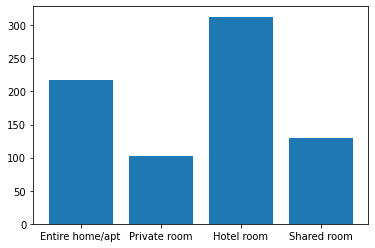

In [22]:
import matplotlib.pyplot as plt
mean_price_per_room_type = defaultdict(list)

for row in df.iterrows():
    mean_price_per_room_type[row[1]['room_type']].append(row[1]['price'])

for key, val in mean_price_per_room_type.items():
    mean_price_per_room_type[key] = sum(val) / len(val)

plt.bar(mean_price_per_room_type.keys(), mean_price_per_room_type.values())

-> your answer here

e) Plot on the NYC map the top 10 most expensive listings - (2.5 points)

In [23]:
temp = df.copy(deep=True)
temp = temp.sort_values(by=['price'], ascending=False)

temp = temp[:][:10]

m = display(temp)

m

f) Plot on the NYC map the top 10 most reviewed listings - (2.5 points)


In [24]:
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
temp = df.copy(deep=True)
temp = temp.sort_values(by=['number_of_reviews'], ascending=False)

temp = temp[:][:10]

m = display(temp, 'number_of_reviews')

m

g) Plot on the NYC map the top 10 most available listings - (2.5 points)

In [17]:
df['availability_365'] = df['availability_365'].astype(int)
temp = df.copy(deep=True)
temp = temp.sort_values(by=['availability_365'], ascending=False)

temp = temp[:][:10]

m = display(temp, 'availability_365')

m

h) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map in a color corresponding to their cluster. - (5 points)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)


i) You should see points in the same cluster all over the map - briefly explain why that is. - (2.5 points)

-> your answer here

j) How many clusters would you recommend using instead of 5? Display and interpret either the silhouette scores or the elbow method. - (5 points)

-> your answer here

k) Would you recommend normalizing the price and number of reviews? Briefly explain why. - (2.5 points)

-> your answer here

l) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. - (5 points)


m) briefly comment on what you observe from the structure of the dendrogram.  - (2.5 points)

-> your answer here

n) Normalize the `price` as in b) and repeat l) - (2.5 points)

## Exercise 2 (50 points)

This exercise will be using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

a) Using Kmeans, cluster the images using 10 clusters and plot the centroid of each cluster. - (10 points)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)

kmeans = KMeans(n_clusters=10)

centres = kmeans.fit_transform(data)
# temp = defaultdict(list)

# for i in range(len(centres)):
#     temp[centres[i]].append(data[i])

# plt.scatter(temp.keys, temp.values())

print(centres[0])

# your code here

[46.29322479 41.74284925 46.72660737 39.4060487  42.32319204 14.00270609
 40.66844441 32.32255449 39.09451223 44.68092395]


b) what is the disagreement distance between the clustering you created above and the clustering created by the labels attached to each image? Briefly explain what this number means in this context. - (10 points)

c) Download the CIFAR-10 dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html). Open `batch_1` by following the documentation on the web page. Plot a random image from the dataset. - (10 points)

d) This image is 32 x 32 pixels and each pixel is a 3-dimensional object of RGB (Red, Green, Blue) intensities. Using the same image as in c), produce an image that only uses 4 colors (the 4 centroids of the clusters obtained by clustering the image itself using Kmeans). - (10 points)

e) Write a function that applies this transformation to the entire dataset for any number K of colors. - (10 points)